In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
train_dir = r'C:\Users\pirat\Downloads\archive (3)\Data\train'
test_dir = r'C:\Users\pirat\Downloads\archive (3)\Data\test'

img_width, img_height = 150, 150
batch_size = 32

num_classes = 3


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                11214912  
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 11,216,003
Trainable params: 11,216,003
Non-trainable params: 0
__________________________________________

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
history = model.fit(train_generator, epochs=5, validation_data=test_generator)


Epoch 1/5
8/8 [==============================] - 5s 596ms/step - loss: 10.2931 - accuracy: 0.3267 - val_loss: 1.4460 - val_accuracy: 0.6970
Epoch 2/5
8/8 [==============================] - 4s 497ms/step - loss: 1.8218 - accuracy: 0.6614 - val_loss: 1.7866 - val_accuracy: 0.6212
Epoch 3/5
8/8 [==============================] - 4s 518ms/step - loss: 0.5715 - accuracy: 0.8167 - val_loss: 0.7608 - val_accuracy: 0.6364
Epoch 4/5
8/8 [==============================] - 4s 511ms/step - loss: 0.3387 - accuracy: 0.8884 - val_loss: 0.5218 - val_accuracy: 0.7576
Epoch 5/5
8/8 [==============================] - 4s 533ms/step - loss: 0.1997 - accuracy: 0.9522 - val_loss: 0.5008 - val_accuracy: 0.7273


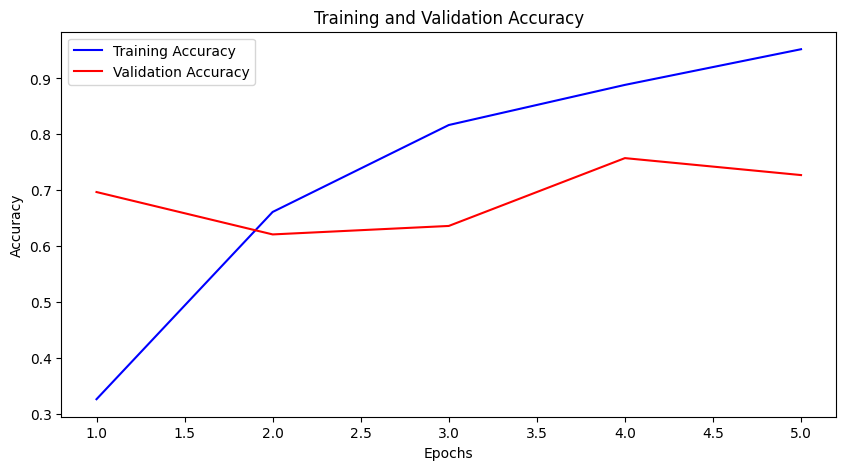

In [15]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_accuracy) + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# vgg16

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

for layer in base_model.layers:
    layer.trainable = False


58889256/58889256 [==============================] - 16s 0us/step


In [19]:
# Create a new model on top of the pre-trained model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')  # Assuming 3 classes (Covid, Normal, Viral Pneumonia)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [24]:
# Create data generators without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and prepare the training and test data using the generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=2,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)


Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [25]:
# Train the model
history = model.fit(train_generator, epochs=5, validation_data=test_generator)


Epoch 1/5
126/126 [==============================] - 6s 45ms/step - loss: 0.3647 - accuracy: 0.9004 - val_loss: 0.2719 - val_accuracy: 0.9545
Epoch 2/5
126/126 [==============================] - 5s 36ms/step - loss: 0.1345 - accuracy: 0.9641 - val_loss: 0.3784 - val_accuracy: 0.8939
Epoch 3/5
126/126 [==============================] - 5s 36ms/step - loss: 0.1536 - accuracy: 0.9402 - val_loss: 0.6222 - val_accuracy: 0.8485
Epoch 4/5
126/126 [==============================] - 5s 36ms/step - loss: 0.0540 - accuracy: 0.9761 - val_loss: 0.2913 - val_accuracy: 0.8939
Epoch 5/5
126/126 [==============================] - 5s 38ms/step - loss: 0.0239 - accuracy: 0.9841 - val_loss: 0.7236 - val_accuracy: 0.8030


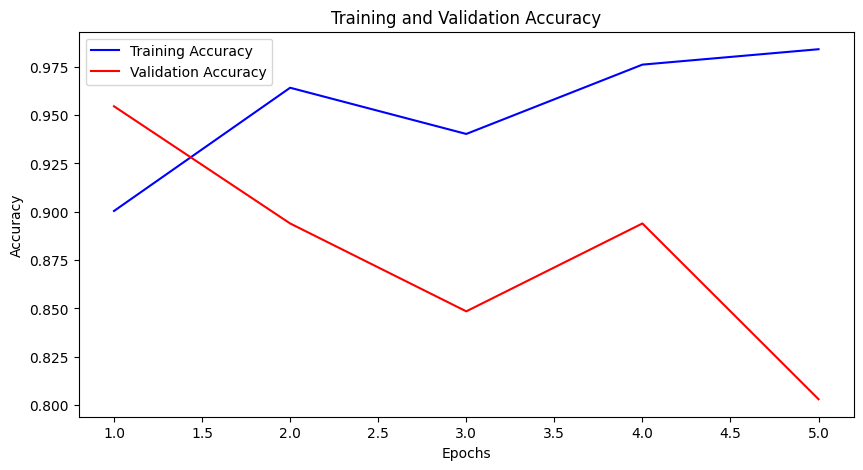

In [26]:
import matplotlib.pyplot as plt

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_accuracy) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, training_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
